**1. Подключение библиотек**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

**2. Загрузка данных**

In [ ]:
uploaded = files.upload()

Saving Cancer_Data.csv to Cancer_Data.csv


In [ ]:
# Загрузка данных из файла
dataset = pd.read_csv('Cancer_Data.csv')

# Оставляем только указанные колонки
columns_to_keep = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
    "area_mean", "smoothness_mean", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst"
]
dataset = dataset[columns_to_keep]

# Просмотр первых строк
print(dataset.head())

# Проверка на наличие пропущенных значений
print("\nКоличество пропущенных значений:\n", dataset.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  radius_worst  texture_worst  perimeter_worst  area_worst  \
0          0.11840         25.38          17.33           184.60      2019.0   
1          0.08474         24.99          23.41           158.80      1956.0   
2          0.10960         23.57          25.53           152.50      1709.0   
3          0.14250         14.91          26.50            98.87       567.7   
4          0.10030         22.54          16.67           152.20      1575.0   

   smoothness_worst  
0            0.1622  


**3. Разделение на признаки и целевую переменную**

In [ ]:
# Установить точность вывода для NumPy и выключить экспоненциальную нотацию
np.set_printoptions(precision=4, suppress=True)

# Разделение на матрицу признаков X и зависимую переменную y
# iloc - это метод для индексации по числовым позициям (индексы строк и столбцов).
X = dataset.iloc[:, 2:].values  # Все числовые признаки начиная с третьего столбца
y = dataset.iloc[:, 1].values  # "diagnosis" - целевая переменная

print("Матрица признаков (первые 5 строк):\n", X[:5])
print("\nЗависимая переменная (первые 5 значений):\n", y[:5])


Матрица признаков (первые 5 строк):
 [[  17.99     10.38    122.8    1001.        0.1184   25.38     17.33
   184.6    2019.        0.1622]
 [  20.57     17.77    132.9    1326.        0.0847   24.99     23.41
   158.8    1956.        0.1238]
 [  19.69     21.25    130.     1203.        0.1096   23.57     25.53
   152.5    1709.        0.1444]
 [  11.42     20.38     77.58    386.1       0.1425   14.91     26.5
    98.87    567.7       0.2098]
 [  20.29     14.34    135.1    1297.        0.1003   22.54     16.67
   152.2    1575.        0.1374]]

Зависимая переменная (первые 5 значений):
 ['M' 'M' 'M' 'M' 'M']


**4. Обработка пропущенных значений**

In [ ]:
# SimpleImputer — это класс из библиотеки sklearn.impute, который используется для замены пропущенных значений в данных.
# Если в данных есть пропущенные значения, заменяем их средним значением
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # пропущенные значения будут заменены средним значением соответствующего столбца
# Обучает преобразователь на данных (с помощью метода fit), а затем применяет трансформацию (с помощью метода transform).
X = imputer.fit_transform(X)

print("\nМатрица признаков после обработки пропущенных значений (первые 5 строк):\n", X[:5])



Матрица признаков после обработки пропущенных значений (первые 5 строк):
 [[  17.99     10.38    122.8    1001.        0.1184   25.38     17.33
   184.6    2019.        0.1622]
 [  20.57     17.77    132.9    1326.        0.0847   24.99     23.41
   158.8    1956.        0.1238]
 [  19.69     21.25    130.     1203.        0.1096   23.57     25.53
   152.5    1709.        0.1444]
 [  11.42     20.38     77.58    386.1       0.1425   14.91     26.5
    98.87    567.7       0.2098]
 [  20.29     14.34    135.1    1297.        0.1003   22.54     16.67
   152.2    1575.        0.1374]]


**5. Обработка категориальных данных**

5.1 Кодирование категориального признака "diagnosis"

In [ ]:
# LabelEncoder — это класс из библиотеки sklearn.preprocessing, который используется для
# преобразования меток категориальных переменных в числовые значения
labelencoder_y = LabelEncoder() # labelencoder_y — это объект класса LabelEncoder, который будет выполнять кодирование.
print("\nЦелевая переменная до кодирования:\n", y[:50])
y = labelencoder_y.fit_transform(y)
print("\nЦелевая переменная после кодирования:\n", y[:50])



Целевая переменная до кодирования:
 ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B']

Целевая переменная после кодирования:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0]


OneHotEncoder здесь не нужен, так как целевая переменная уже бинарная. Если бы была более двух категорий, можно было бы применить OneHotEncoder.

**6. Разделение на обучающую и тестовую выборки**

In [ ]:
# Деление данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")



Размеры выборок:
Обучающая выборка: (455, 10), (455,)
Тестовая выборка: (114, 10), (114,)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Модель для классификации
model = RandomForestClassifier(random_state=42)

# Кросс-валидация на обучающей выборке
skf = StratifiedKFold(n_splits=6, shuffle=True,  random_state=42) # Параметр shuffle=True указывает, что данные будут случайным образом перемешаны перед разбиением на фолды

# Выполнение кросс-валидации. cross_val_score выполняет кросс-валидацию на обучающих данных
# model — это модель, которую мы будем обучать и оценивать.
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print("\nКросс-валидация на обучающей выборке:")
print(f"Скорости на каждом фолде: {cv_scores}")
print(f"Средняя точность: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")



Кросс-валидация на обучающей выборке:
Скорости на каждом фолде: [1.     0.9605 0.9211 0.9474 0.9737 0.9467]
Средняя точность: 0.9582
Стандартное отклонение: 0.0246


**7. Визуализация данных**

Гистограмма распределения целевой переменной

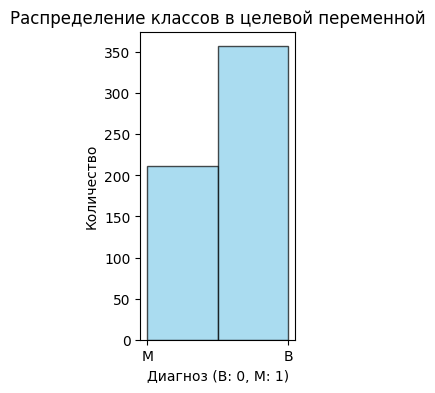

In [ ]:
# Визуализация распределения значений целевой переменной
plt.figure(figsize=(2, 4))
# dataset['diagnosis'] — это столбец данных, который содержит целевую переменную (диагноз).
# Значения в этом столбце могут быть категориальными, например, B (доброкачественная опухоль) и M (злокачественная опухоль).
plt.hist(dataset['diagnosis'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение классов в целевой переменной")
plt.xlabel("Диагноз (B: 0, M: 1)")
plt.ylabel("Количество")
plt.show()


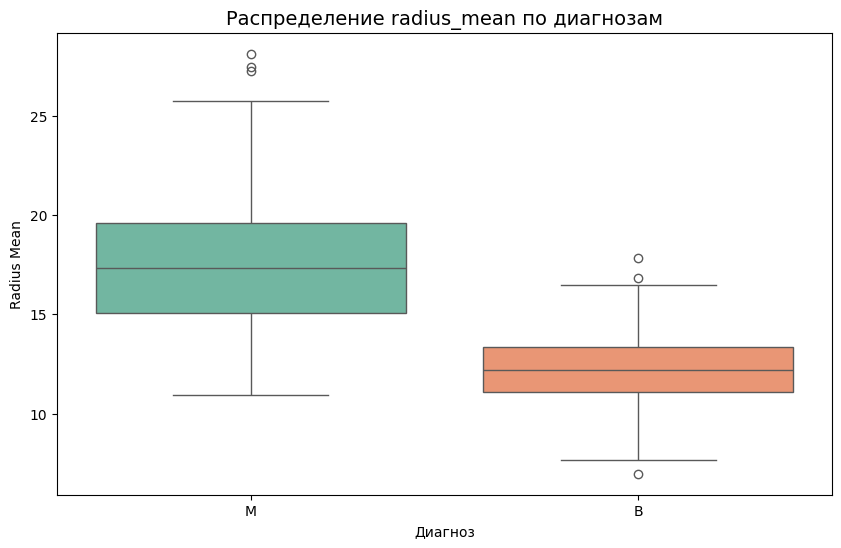

In [ ]:
# Визуализация: Box plot для 'diagnosis' vs. 'radius_mean'
plt.figure(figsize=(10, 6))
# функция для построения диаграммы размаха
# на оси X будет отображаться переменная diagnosis (целевой признак),
# которая разделяет данные на два класса: доброкачественные (B) и злокачественные (M).
sns.boxplot(x='diagnosis', y='radius_mean', data=dataset, palette="Set2", hue='diagnosis') # Данные для построения графика берутся из DataFrame dataset.
plt.title("Распределение radius_mean по диагнозам", fontsize=14)
plt.xlabel("Диагноз")
plt.ylabel("Radius Mean")
plt.show()
# Границы коробки обозначают межквартильный размах (IQR, interquartile range). Это область между первым (Q1) и третьим квартилем (Q3), которая включает 50% данных.
# Q1 (первый квартиль) — это значение, которое разделяет 25% наименьших данных от оставшихся 75%.
# Q3 (третий квартиль) — это значение, которое разделяет 75% данных от оставшихся 25%.
# Таким образом, коробка содержит диапазон, в котором лежат центральные 50% значений.


Матрица корреляции

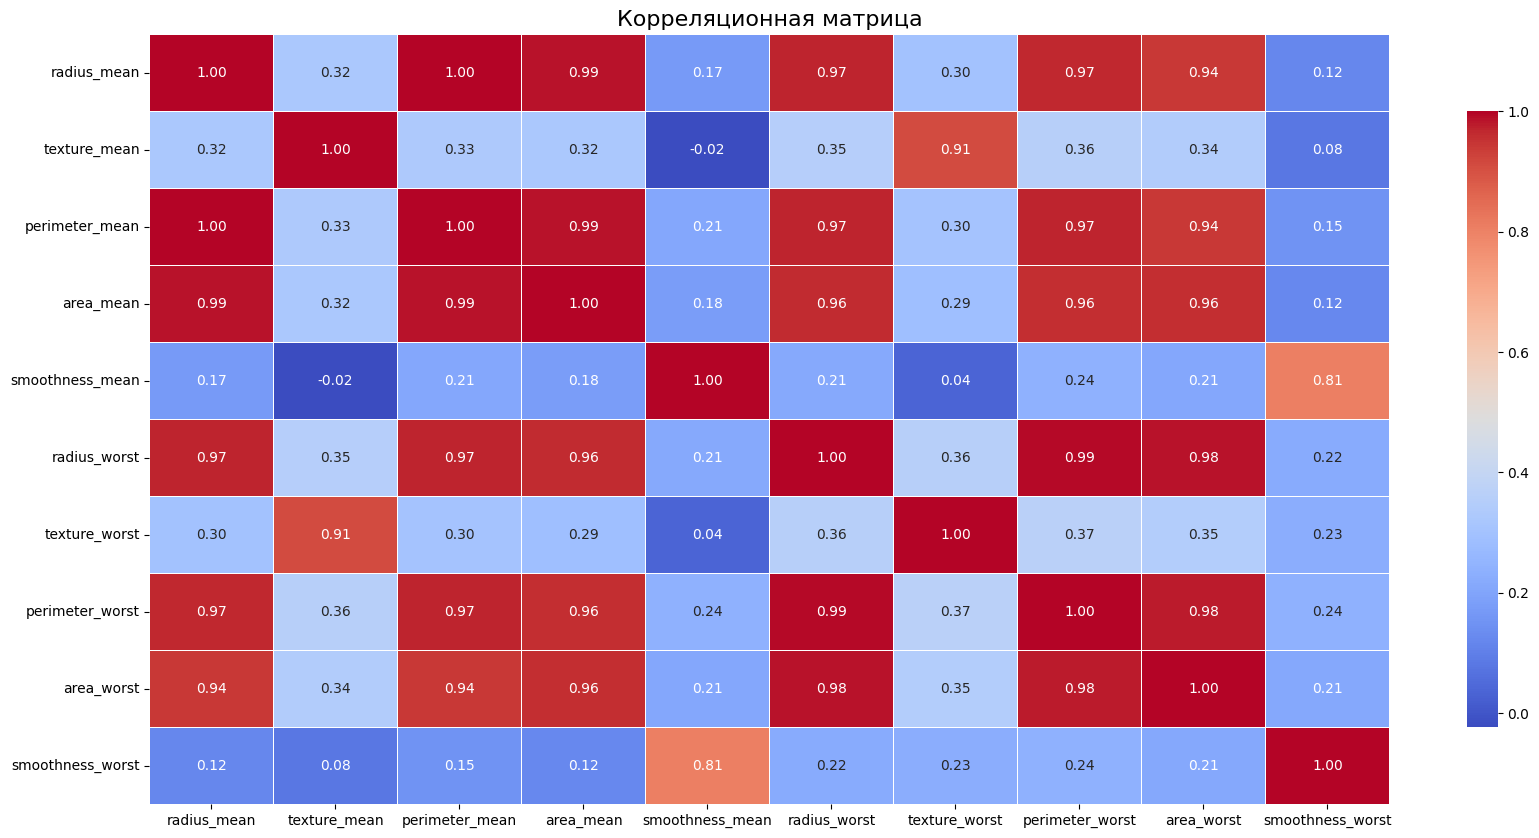

In [ ]:
# Строим корреляционную матрицу
correlation_matrix = dataset.iloc[:, 2:].corr() # Функция, которая вычисляет корреляцию между всеми числовыми признаками в подвыборке
# Настроим размерность графика
plt.figure(figsize=(20, 10))
# Строим heatmap (тепловую карту) с числовыми значениями внутри ячеек
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
# Добавим заголовок
plt.title("Корреляционная матрица", fontsize=16)
# Покажем график
plt.show()


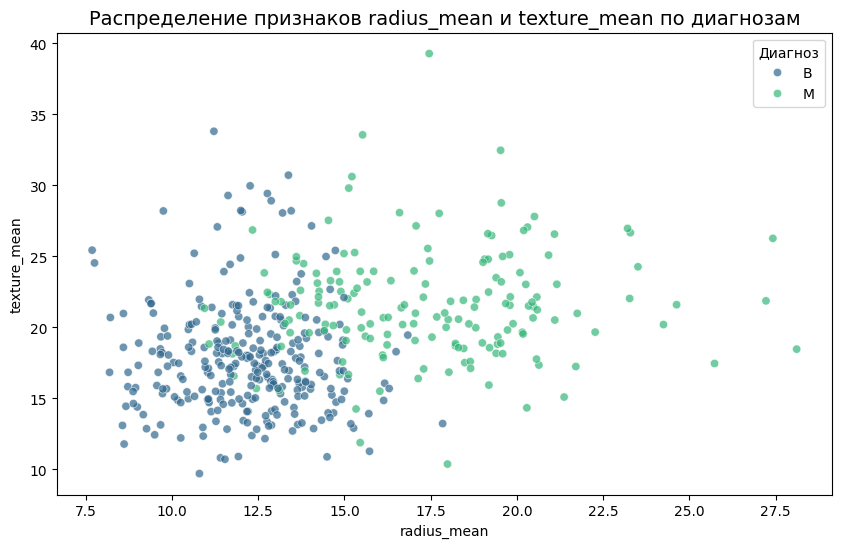

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем названия столбцов на основе исходного DataFrame
feature_names = dataset.columns[2:]  # Предположим, признаки начинаются с третьего столбца

# Преобразуем массив признаков X_train обратно в DataFrame с исходными названиями
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Выбор признаков для визуализации
feature_1 = feature_names[0]  # признак 'radius_mean'
feature_2 = feature_names[1]  # признак 'texture_mean'
diagnosis = y_train  # Целевая переменная (диагноз)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df[feature_1], y=X_train_df[feature_2], hue=diagnosis, palette="viridis", alpha=0.7)
plt.title(f"Распределение признаков {feature_1} и {feature_2} по диагнозам", fontsize=14)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(title="Диагноз")
plt.show()
